## Discretisation

Discretisation is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that span the range of the variable's values. Discretisation is also called **binning**, where bin is an alternative name for interval.


### Discretisation helps handle outliers and may improve value spread in skewed variables

Discretisation helps handle outliers by placing these values into the lower or higher intervals, together with the remaining inlier values of the distribution. Thus, these outlier observations no longer differ from the rest of the values at the tails of the distribution, as they are now all together in the same interval / bucket. In addition, by creating appropriate bins or intervals, discretisation can help spread the values of a skewed variable across a set of bins with equal number of observations.


### Discretisation approaches

There are several approaches to transform continuous variables into discrete ones. Discretisation methods fall into 2 categories: **supervised and unsupervised**. Unsupervised methods do not use any information, other than the variable distribution, to create the contiguous bins in which the values will be placed. Supervised methods typically use target information in order to create the bins or intervals.


####  Unsupervised discretisation methods

- Equal width discretisation
- Equal frequency discretisation
- K-means discretisation

#### Supervised discretisation methods

- Discretisation using decision trees


In this lecture, I will describe **equal width discretisation**.


## Equal width discretisation

Equal width discretisation divides the scope of possible values into N bins of the same width.The width is determined by the range of values in the variable and the number of bins we wish to use to divide the variable:

width = (max value - min value) / N

where N is the number of bins or intervals.

For example if the values of the variable vary between 0 and 100, we create 5 bins like this: width = (100-0) / 5 = 20. The bins thus are 0-20, 20-40, 40-60, 80-100. The first and final bins (0-20 and 80-100) can be expanded to accommodate outliers (that is, values under 0 or greater than 100 would be placed in those bins as well).

There is no rule of thumb to define N, that is something to determine experimentally.

## In this demo

We will learn how to perform equal width binning using:

- pandas and NumPy
- Feature-engine
- Scikit-learn

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import KBinsDiscretizer

from feature_engine.discretisers import EqualWidthDiscretiser

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumption in miles per gallon,
    to be predicted in terms of 3 multivalued discrete and 5 continuous
    attributes." (Quinlan, 1993)

In [2]:
data_raw = pd.read_csv('C://Users/gusal/machine learning/Feature engineering/auto-mpg_rev1.csv')

In [21]:

data_raw.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,16.0,8,304.0,150.0,3433.0,12.0,70,1
2,15.0,8,429.0,198.0,4341.0,10.0,70,1
3,14.0,8,454.0,220.0,4354.0,9.0,70,1
4,14.0,8,440.0,215.0,4312.0,8.5,70,1


In [4]:
data_raw.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [5]:
data_raw.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [7]:
inputs = data_raw.drop(['mpg'], axis = 1)
target = data_raw.mpg

In [8]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    inputs,
    target,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((247, 7), (106, 7))

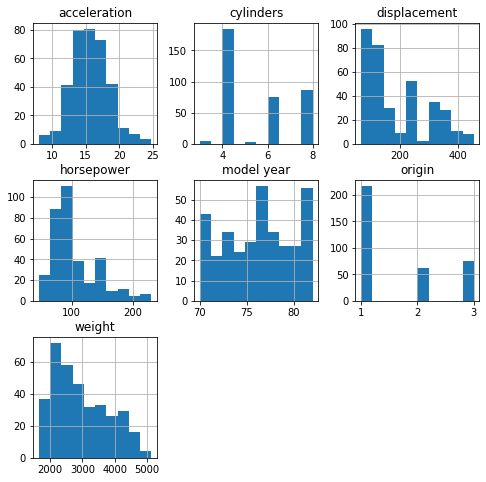

In [11]:
# let's explore the distribution of the numerical variables

inputs.hist(figsize=(8,8))
plt.show()

## Equal width discretisation with pandas and NumPy

First we need to determine the intervals' edges or limits.

In [12]:
# let's capture the range of the variable weight

weight_range = X_train['weight'].max() - X_train['weight'].min()

weight_range

3491.0

In [13]:
# let's divide the range into 10 equal width bins

weight_range / 10

349.1

The range or width of our intervals will be 349.

In [14]:
# now let's capture the lower and upper boundaries

min_value = int(np.floor( X_train['weight'].min()))
max_value = int(np.ceil( X_train['weight'].max()))

# let's round the bin width
inter_value = int(np.round(weight_range / 10))

min_value, max_value, inter_value

(1649, 5140, 349)

In [15]:
# let's capture the interval limits, so we can pass them to the pandas cut 
# function to generate the bins

intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]

intervals

[1649, 1998, 2347, 2696, 3045, 3394, 3743, 4092, 4441, 4790, 5139, 5488]

In [16]:
# let's make labels to label the different bins

labels = ['Bin_' + str(i) for i in range(1, len(intervals))]

labels

['Bin_1',
 'Bin_2',
 'Bin_3',
 'Bin_4',
 'Bin_5',
 'Bin_6',
 'Bin_7',
 'Bin_8',
 'Bin_9',
 'Bin_10',
 'Bin_11']

In [17]:
# create binned weight/ discretise weight

# create one column with labels
X_train['weight_disc_labels'] = pd.cut(x=X_train['weight'],
                                    bins=intervals,
                                    labels=labels,
                                    include_lowest=True)

# and one with bin boundaries
X_train['weight_disc'] = pd.cut(x=X_train['weight'],
                             bins=intervals,
                             include_lowest=True)

X_train.head(10)

C:\Users\gusal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\gusal\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,cylinders,displacement,horsepower,weight,acceleration,model year,origin,weight_disc_labels,weight_disc
224,6,258.0,120.0,3410.0,15.1,78,1,Bin_6,"(3394.0, 3743.0]"
275,4,140.0,88.0,2870.0,18.1,80,1,Bin_4,"(2696.0, 3045.0]"
124,6,250.0,105.0,3459.0,16.0,75,1,Bin_6,"(3394.0, 3743.0]"
171,6,258.0,95.0,3193.0,17.8,76,1,Bin_5,"(3045.0, 3394.0]"
306,4,85.0,65.0,1975.0,19.4,81,3,Bin_1,"(1648.999, 1998.0]"
145,4,90.0,70.0,1937.0,14.0,75,2,Bin_1,"(1648.999, 1998.0]"
214,8,260.0,110.0,3365.0,15.5,78,1,Bin_5,"(3045.0, 3394.0]"
81,8,360.0,170.0,4654.0,13.0,73,1,Bin_9,"(4441.0, 4790.0]"
1,8,304.0,150.0,3433.0,12.0,70,1,Bin_6,"(3394.0, 3743.0]"
133,6,258.0,110.0,3730.0,19.0,75,1,Bin_6,"(3394.0, 3743.0]"


We can see in the above output how by discretising using equal width, we placed each weight observation within one interval / bin. For example, weight = 3504.0.0 was placed in the 3394.0, 3743.0 interval, whereas 3015.0 was placed into the 2696.0, 3045.0 interval.

When performing equal width discretisation, we guarantee that the intervals are all of the same lenght, however there won't necessarily be the same number of observations in each of the intervals. See below:

In [20]:
X_train.groupby('weight_disc')['weight'].count()

weight_disc
(1648.999, 1998.0]    29
(1998.0, 2347.0]      47
(2347.0, 2696.0]      44
(2696.0, 3045.0]      29
(3045.0, 3394.0]      24
(3394.0, 3743.0]      22
(3743.0, 4092.0]      11
(4092.0, 4441.0]      23
(4441.0, 4790.0]      15
(4790.0, 5139.0]       2
(5139.0, 5488.0]       1
Name: weight, dtype: int64

Text(0, 0.5, 'Number of observations per bin')

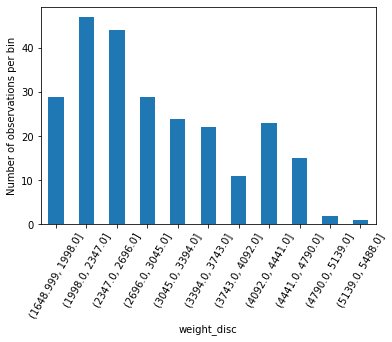

In [23]:
X_train.groupby('weight_disc')['weight'].count().plot.bar()
plt.xticks(rotation=60)
plt.ylabel('Number of observations per bin')

very fwe observation are in the intervals 4790 to 5488


Now, we can discretise weight in the test set, using the same interval boundaries that we calculated for the train set:

In [24]:
# create binned weight/ discretise weight

# create one column with labels
X_test['weight_disc_labels'] = pd.cut(x=X_test['weight'],
                                    bins=intervals,
                                    labels=labels,
                                    include_lowest=True)

# and one with bin boundaries
X_test['weight_disc'] = pd.cut(x=X_test['weight'],
                             bins=intervals,
                             include_lowest=True)

X_test.head(10)

C:\Users\gusal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\gusal\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,cylinders,displacement,horsepower,weight,acceleration,model year,origin,weight_disc_labels,weight_disc
6,8,340.0,160.0,3609.0,8.0,70,1,Bin_6,"(3394.0, 3743.0]"
140,4,140.0,78.0,2592.0,18.5,75,1,Bin_3,"(2347.0, 2696.0]"
299,4,156.0,92.0,2620.0,14.4,81,1,Bin_3,"(2347.0, 2696.0]"
217,6,231.0,105.0,3535.0,19.2,78,1,Bin_6,"(3394.0, 3743.0]"
90,8,350.0,145.0,4082.0,13.0,73,1,Bin_7,"(3743.0, 4092.0]"
226,6,231.0,165.0,3445.0,13.4,78,1,Bin_6,"(3394.0, 3743.0]"
114,4,97.0,78.0,2300.0,14.5,74,2,Bin_2,"(1998.0, 2347.0]"
60,4,96.0,69.0,2189.0,18.0,72,2,Bin_2,"(1998.0, 2347.0]"
37,4,116.0,90.0,2123.0,14.0,71,2,Bin_2,"(1998.0, 2347.0]"
293,6,168.0,132.0,2910.0,11.4,80,3,Bin_4,"(2696.0, 3045.0]"


Text(0, 0.5, 'Number of observations per bin')

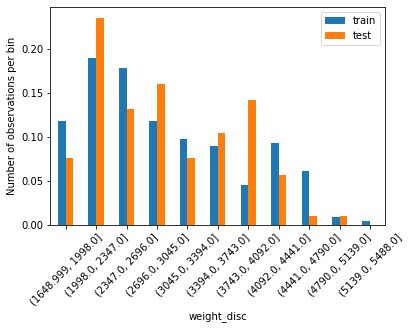

In [25]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set
# let's see that below

t1 = X_train.groupby(['weight_disc'])['weight'].count() / len(X_train)
t2 = X_test.groupby(['weight_disc'])['weight'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

there is not data test in the last interval 5139-5488. In this case we should combine the last two intervals

## Equal width discretisation with Feature-Engine

In [40]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    inputs,
    target,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((247, 7), (106, 7))

In [41]:
X_train.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [42]:
# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualWidthDiscretiser(bins=10, variables = ['displacement','weight', 'horsepower','acceleration'])

disc.fit(X_train)

EqualWidthDiscretiser(bins=10, return_object=False,
                      variables=['displacement', 'weight', 'horsepower',
                                 'acceleration'])

In [43]:
# in the binner dict, we can see the limits of the intervals. For weight
# the value increases aproximately 349 from one bin to the next.

# for horsepower it increases in around 18 from one interval to the 
# next, but it increases always the same value, aka, same width.

disc.binner_dict_

{'displacement': [-inf,
  108.5,
  147.0,
  185.5,
  224.0,
  262.5,
  301.0,
  339.5,
  378.0,
  416.5,
  inf],
 'weight': [-inf,
  1998.1,
  2347.2,
  2696.3,
  3045.4,
  3394.5,
  3743.6000000000004,
  4092.7000000000003,
  4441.8,
  4790.9,
  inf],
 'horsepower': [-inf,
  64.4,
  82.8,
  101.19999999999999,
  119.6,
  138.0,
  156.39999999999998,
  174.79999999999998,
  193.2,
  211.6,
  inf],
 'acceleration': [-inf,
  10.13,
  11.76,
  13.39,
  15.02,
  16.65,
  18.28,
  19.91,
  21.54,
  23.17,
  inf]}

In [44]:
# transform train and text

train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

In [45]:
train_t.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
224,6,4,4,5,4,78,1
275,4,1,2,3,5,80,1
124,6,4,3,5,4,75,1
171,6,4,2,4,5,76,1
306,4,0,1,0,6,81,3


Text(0, 0.5, 'Number of observations per bin')

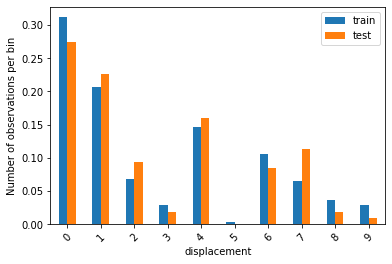

In [47]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set
# let's see that below

t1 = train_t.groupby(['displacement'])['displacement'].count() / len(train_t)
t2 = test_t.groupby(['displacement'])['displacement'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

interval 5 does not have test data, it should combined with interval 6

Text(0, 0.5, 'Number of observations per bin')

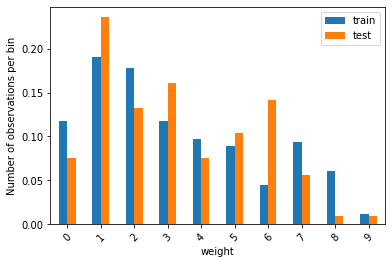

In [46]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set
# let's see that below

t1 = train_t.groupby(['weight'])['weight'].count() / len(train_t)
t2 = test_t.groupby(['weight'])['weight'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

We can see quite clearly, that equal width discretisation does not improve the value spread. The original variable weight was skewed, and the discrete variable is also skewed. at least the test data is included in all the intervals

## Equal width discretisation with Scikit-learn

In [48]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    inputs,
    target,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((247, 7), (106, 7))

In [49]:
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

disc.fit(X_train[['displacement','weight', 'horsepower','acceleration']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [50]:
disc.bin_edges_

array([array([ 70. , 108.5, 147. , 185.5, 224. , 262.5, 301. , 339.5, 378. ,
       416.5, 455. ]),
       array([1649. , 1998.1, 2347.2, 2696.3, 3045.4, 3394.5, 3743.6, 4092.7,
       4441.8, 4790.9, 5140. ]),
       array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
       211.6, 230. ]),
       array([ 8.5 , 10.13, 11.76, 13.39, 15.02, 16.65, 18.28, 19.91, 21.54,
       23.17, 24.8 ])], dtype=object)

In [51]:
train_t = disc.transform(X_train[['displacement','weight', 'horsepower','acceleration']])

train_t = pd.DataFrame(train_t, columns = ['displacement','weight', 'horsepower','acceleration'])

train_t.head()

,displacement,weight,horsepower,acceleration
0,4.0,5.0,4.0,4.0
1,1.0,3.0,2.0,5.0
2,4.0,5.0,3.0,4.0
3,4.0,4.0,2.0,5.0
4,0.0,0.0,1.0,6.0


In [52]:
test_t = disc.transform(X_test[['displacement','weight', 'horsepower','acceleration']])

test_t = pd.DataFrame(test_t, columns = ['displacement','weight', 'horsepower','acceleration'])

Text(0, 0.5, 'Number of observations per bin')

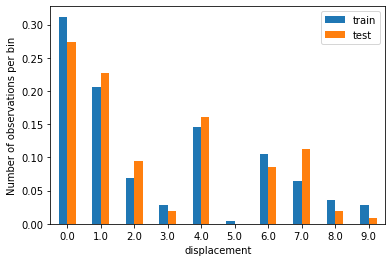

In [53]:
t1 = train_t.groupby(['displacement'])['displacement'].count() / len(train_t)
t2 = test_t.groupby(['displacement'])['displacement'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

there is not test data in the interval 5

Text(0, 0.5, 'Number of observations per bin')

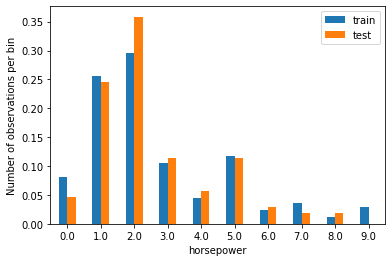

In [54]:
t1 = train_t.groupby(['horsepower'])['horsepower'].count() / len(train_t)
t2 = test_t.groupby(['horsepower'])['horsepower'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

there is not test data in the interval 9